In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_excel("parking.xls")
df

,Bldg City,Bldg State,Bldg Status,Property Type,Total Parking Spaces,Owned/Leased
0,HARTFORD,CT,ACTIVE,BUILDING,29,OWNED
1,NEW HAVEN,CT,ACTIVE,BUILDING,0,OWNED
2,WATERBURY,CT,ACTIVE,BUILDING,2,LEASED
3,WILLIMANTIC,CT,ACTIVE,BUILDING,0,LEASED
4,HARTFORD,CT,ACTIVE,BUILDING,103,OWNED
...,...,...,...,...,...,...
9055,FALLON,NV,ACTIVE,BUILDING,12,LEASED
9056,ELKO,NV,ACTIVE,BUILDING,2,LEASED
9057,LAS VEGAS,NV,ACTIVE,BUILDING,3,LEASED
9058,LAS VEGAS,NV,ACTIVE,BUILDING,24,LEASED


In [4]:
df['Bldg Status'].value_counts()

ACTIVE            8981
EXCESS              70
DECOMMISSIONED       9
Name: Bldg Status, dtype: int64

In [5]:
df['Owned/Leased'].value_counts()

LEASED    6940
OWNED     2120
Name: Owned/Leased, dtype: int64

In [6]:
df['Property Type'].value_counts()

BUILDING     8602
STRUCTURE     339
LAND          119
Name: Property Type, dtype: int64

# Distribution of owned or lease

<BarContainer object of 9060 artists>

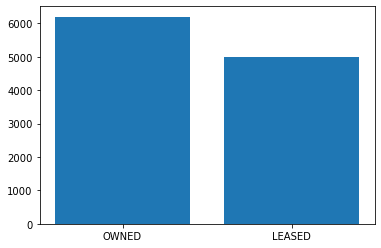

In [7]:
plt.bar(df['Owned/Leased'], df['Total Parking Spaces'])

In [8]:
owne_leased = pd.pivot_table(df, index ='Owned/Leased', values = 'Total Parking Spaces',aggfunc='count')
owne_leased

,Total Parking Spaces
Owned/Leased,
LEASED,6940
OWNED,2120


<BarContainer object of 2 artists>

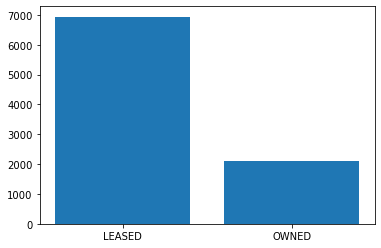

In [9]:
plt.bar(owne_leased.index, owne_leased['Total Parking Spaces'])

# In which building state parking situation is excess - put it in an order

In [10]:
df.head()

,Bldg City,Bldg State,Bldg Status,Property Type,Total Parking Spaces,Owned/Leased
0,HARTFORD,CT,ACTIVE,BUILDING,29,OWNED
1,NEW HAVEN,CT,ACTIVE,BUILDING,0,OWNED
2,WATERBURY,CT,ACTIVE,BUILDING,2,LEASED
3,WILLIMANTIC,CT,ACTIVE,BUILDING,0,LEASED
4,HARTFORD,CT,ACTIVE,BUILDING,103,OWNED


<BarContainer object of 11 artists>

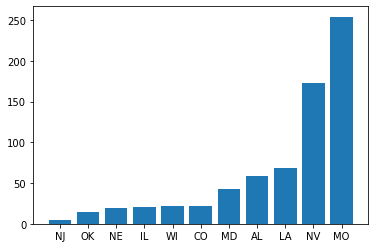

In [15]:
excess_parking = pd.pivot_table(df, index = 'Bldg State', columns = 'Bldg Status', values = 'Total Parking Spaces')
excess_parking = excess_parking[excess_parking.EXCESS > 0]
excess_parking_sorted = excess_parking.EXCESS.sort_values() 
plt.bar(excess_parking_sorted.index, excess_parking_sorted.values)

# Cities that are decommisioned along with total parking

<BarContainer object of 2 artists>

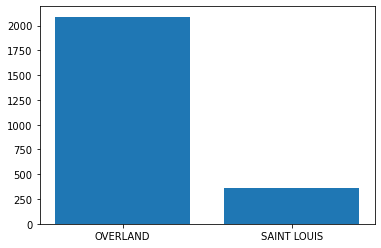

In [18]:
decom_parking_city = df.loc[(df["Bldg Status"] == "DECOMMISSIONED")]
decom_parking_city = df.loc[(df["Total Parking Spaces"] > 0) & (df["Bldg Status"] == "DECOMMISSIONED")]
plt.bar(decom_parking_city['Bldg City'], decom_parking_city['Total Parking Spaces'])

# In which type of property parking space is in excess

<AxesSubplot:xlabel='Property Type'>

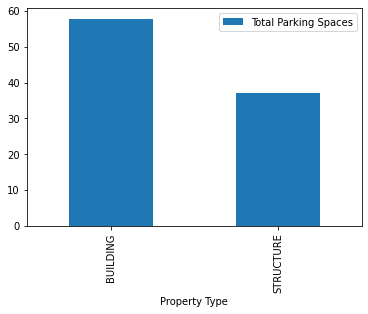

In [20]:
excess_property = pd.pivot_table(df[df['Bldg Status'] == "EXCESS"], index = "Property Type", values = 'Total Parking Spaces')
excess_property.plot(kind='bar')

# Where is more active parking between  owned and leased

Text(0, 0.5, 'Contribution% of Active Parking')

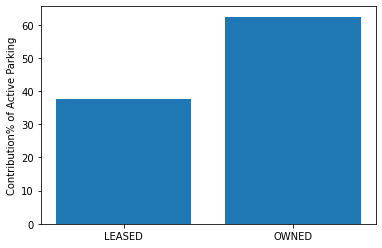

In [23]:
active_park = pd.pivot_table(df[df['Bldg Status'] == 'ACTIVE'], index = 'Owned/Leased', values = 'Total Parking Spaces')
active_park['Total Parking Spaces'].sum()
active_park['% contri']=active_park['Total Parking Spaces']/active_park['Total Parking Spaces'].sum()*100
plt.bar(active_park.index, active_park['% contri'])
plt.ylabel('Contribution% of Active Parking')

# States with more leased parking

In [26]:
state_leased = pd.pivot_table(df[df['Owned/Leased'] == 'LEASED'], index = 'Bldg State', values = 'Total Parking Spaces')
state_leased = state_leased['Total Parking Spaces'].sort_values(ascending=False)
state_leased = pd.DataFrame(state_leased)
state_leased.head()

,Total Parking Spaces
Bldg State,
MO,107.762821
TX,73.457086
VA,72.476316
AL,64.055556
UT,62.505882


# Which property type has more active parking

<AxesSubplot:xlabel='Property Type'>

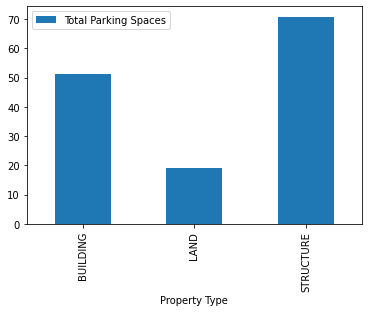

In [27]:
property_active = pd.pivot_table(df[df['Bldg Status'] == 'ACTIVE'], index = 'Property Type', values = 'Total Parking Spaces')
property_active.plot(kind='bar')

# Distribution of parking in city by property type

<AxesSubplot:xlabel='Bldg City'>

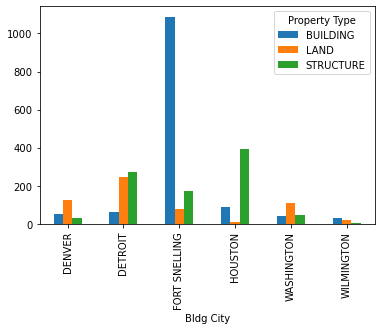

In [29]:
parking_distri_city = pd.pivot_table(df, index = 'Bldg City', columns = 'Property Type', values = 'Total Parking Spaces')
parking_distri_city = parking_distri_city[(parking_distri_city.LAND > 0) & (parking_distri_city.STRUCTURE > 0) ]
parking_distri_city.plot(kind='bar')

# States which has 0 parking spaces

In [30]:
state_with_no_parking = df['Bldg State'] [(df['Total Parking Spaces']) == 0 ]
state_with_no_parking = pd.DataFrame(state_with_no_parking)
state_with_no_parking

,Bldg State
1,CT
3,CT
11,CT
31,CT
35,CT
...,...
9013,NV
9015,NV
9029,NV
9042,NV


# States with max and mini parking space

In [33]:
state_with_max_parking = df['Bldg State'] [df['Total Parking Spaces'] == df['Total Parking Spaces'].max()]
state_with_max_parking = pd.DataFrame(state_with_max_parking)
state_with_max_parking

,Bldg State
8309,CA


In [32]:
state_with_mini_parking = df['Bldg State'] [df['Total Parking Spaces'] == df['Total Parking Spaces'].min()]
state_with_mini_parking = pd.DataFrame(state_with_mini_parking)
state_with_mini_parking

,Bldg State
1,CT
3,CT
11,CT
31,CT
35,CT
...,...
9013,NV
9015,NV
9029,NV
9042,NV
